In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Step 1: Merge datasets and preprocess
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Aggregate transaction data for each customer
customer_summary = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Category': lambda x: x.mode()[0],  # Most frequent category
    'Region': 'first'  # Region from customers.csv
}).reset_index()

# Rename columns for clarity
customer_summary.rename(columns={
    'TotalValue': 'TotalSpending',
    'TransactionID': 'NumTransactions',
    'Category': 'PreferredCategory'
}, inplace=True)

# Step 2: Encode categorical data and normalize
encoder = OneHotEncoder()
region_encoded = encoder.fit_transform(customer_summary[['Region']]).toarray()

scaler = StandardScaler()
numeric_features = scaler.fit_transform(customer_summary[['TotalSpending', 'NumTransactions']])

# Combine all features
features = np.hstack((numeric_features, region_encoded))

# Step 3: Compute similarity
similarity_matrix = cosine_similarity(features)

# Step 4: Generate Lookalike Recommendations
lookalike_dict = {}

for i, customer_id in enumerate(customer_summary['CustomerID']):
    # Get similarity scores for the current customer
    similarities = similarity_matrix[i]
    # Sort by similarity scores (excluding the customer themselves)
    similar_customers = np.argsort(-similarities)[1:4]  # Top 3 lookalikes
    # Map customer IDs to similarity scores
    lookalike_dict[customer_id] = [
        (customer_summary['CustomerID'][idx], similarities[idx]) for idx in similar_customers
    ]

# Save lookalikes for CustomerID: C0001 to C0020
lookalike_subset = {k: v for k, v in lookalike_dict.items() if k in customer_summary['CustomerID'][:20].values}

# Export to CSV
lookalike_df = pd.DataFrame([
    {'CustomerID': k, 'LookalikeCustomers': v} for k, v in lookalike_subset.items()
])
lookalike_df.to_csv('FirstName_LastName_Lookalike.csv', index=False)

print("Lookalike model completed and saved to CSV.")


NameError: name 'transactions' is not defined

In [3]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.6 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/11.1 MB 1.7 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.1 MB 1.8 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/11.1 MB 1.9 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.1 MB 2.0 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/11.1 MB 2.2 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.1 MB 2.3 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/11.1 MB 2.4 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.1 MB 2.5 MB/s eta 0:00:03
   ------------------- -------------------- 5.5/11.1 MB 2.5 MB/s eta 0:00:03
   ---------------------- ----------------- 6.3/11.1 MB 2.6 MB/s eta 0:00:02
   ----------

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Step 1: Merge datasets and preprocess
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Aggregate transaction data for each customer
customer_summary = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Category': lambda x: x.mode()[0],  # Most frequent category
    'Region': 'first'  # Region from customers.csv
}).reset_index()

# Rename columns for clarity
customer_summary.rename(columns={
    'TotalValue': 'TotalSpending',
    'TransactionID': 'NumTransactions',
    'Category': 'PreferredCategory'
}, inplace=True)

# Step 2: Encode categorical data and normalize
encoder = OneHotEncoder()
region_encoded = encoder.fit_transform(customer_summary[['Region']]).toarray()

scaler = StandardScaler()
numeric_features = scaler.fit_transform(customer_summary[['TotalSpending', 'NumTransactions']])

# Combine all features
features = np.hstack((numeric_features, region_encoded))

# Step 3: Compute similarity
similarity_matrix = cosine_similarity(features)

# Step 4: Generate Lookalike Recommendations
lookalike_dict = {}

for i, customer_id in enumerate(customer_summary['CustomerID']):
    # Get similarity scores for the current customer
    similarities = similarity_matrix[i]
    # Sort by similarity scores (excluding the customer themselves)
    similar_customers = np.argsort(-similarities)[1:4]  # Top 3 lookalikes
    # Map customer IDs to similarity scores
    lookalike_dict[customer_id] = [
        (customer_summary['CustomerID'][idx], similarities[idx]) for idx in similar_customers
    ]

# Save lookalikes for CustomerID: C0001 to C0020
lookalike_subset = {k: v for k, v in lookalike_dict.items() if k in customer_summary['CustomerID'][:20].values}

# Export to CSV
lookalike_df = pd.DataFrame([
    {'CustomerID': k, 'LookalikeCustomers': v} for k, v in lookalike_subset.items()
])
lookalike_df.to_csv('FirstName_LastName_Lookalike.csv', index=False)

print("Lookalike model completed and saved to CSV.")


In [10]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Step 1: Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Verify the data is loaded properly
print("Customers Dataset:\n", customers.head())
print("Products Dataset:\n", products.head())
print("Transactions Dataset:\n", transactions.head())

# Step 2: Merge datasets and preprocess
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Aggregate transaction data for each customer
customer_summary = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Category': lambda x: x.mode()[0],  # Most frequent category
    'Region': 'first'  # Region from customers.csv
}).reset_index()

# Rename columns for clarity
customer_summary.rename(columns={
    'TotalValue': 'TotalSpending',
    'TransactionID': 'NumTransactions',
    'Category': 'PreferredCategory'
}, inplace=True)

# Step 3: Encode categorical data and normalize
encoder = OneHotEncoder()
region_encoded = encoder.fit_transform(customer_summary[['Region']]).toarray()

scaler = StandardScaler()
numeric_features = scaler.fit_transform(customer_summary[['TotalSpending', 'NumTransactions']])

# Combine all features
features = np.hstack((numeric_features, region_encoded))

# Step 4: Compute similarity
similarity_matrix = cosine_similarity(features)

# Step 5: Generate Lookalike Recommendations
lookalike_dict = {}

for i, customer_id in enumerate(customer_summary['CustomerID']):
    # Get similarity scores for the current customer
    similarities = similarity_matrix[i]
    # Sort by similarity scores (excluding the customer themselves)
    similar_customers = np.argsort(-similarities)[1:4]  # Top 3 lookalikes
    # Map customer IDs to similarity scores
    lookalike_dict[customer_id] = [
        (customer_summary['CustomerID'][idx], similarities[idx]) for idx in similar_customers
    ]

# Save lookalikes for CustomerID: C0001 to C0020
lookalike_subset = {k: v for k, v in lookalike_dict.items() if k in customer_summary['CustomerID'][:20].values}

# Export to CSV
lookalike_df = pd.DataFrame([
    {'CustomerID': k, 'LookalikeCustomers': v} for k, v in lookalike_subset.items()
])
lookalike_df.to_csv('FirstName_LastName_Lookalike.csv', index=False)

print("Lookalike model completed and saved to 'FirstName_LastName_Lookalike.csv'.")

ModuleNotFoundError: No module named 'networkx'

In [11]:
pip install networkx



   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 243.8 kB/s eta 0:00:05
   ------------ --------------------------- 0.5/1.7 MB 243.8 kB/s eta 0:00:05
   ------------

Lookalike model completed and saved to CSV.


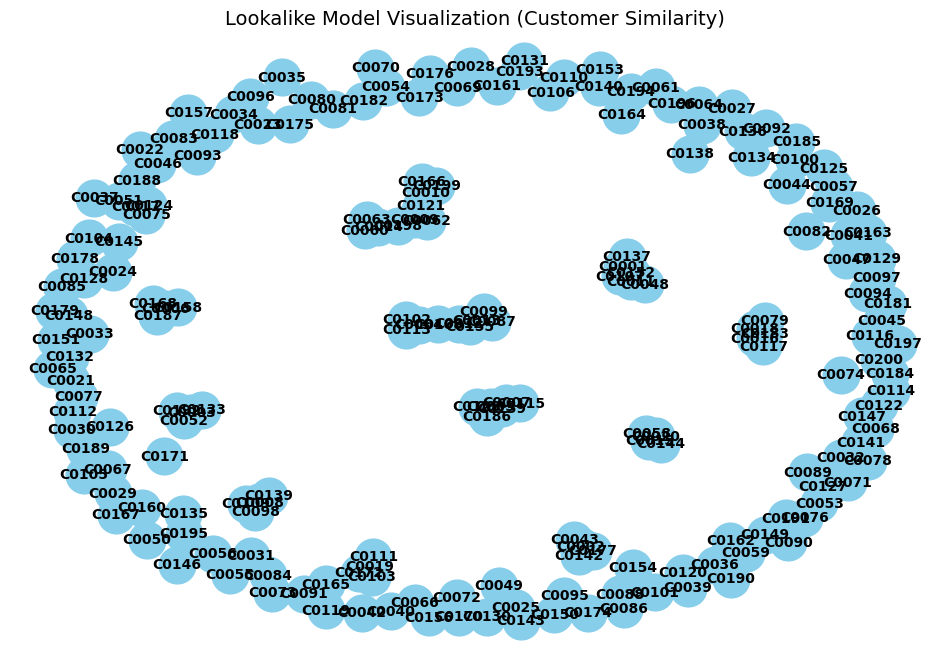

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load and merge datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Aggregate transaction data for each customer
customer_summary = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Category': lambda x: x.mode()[0],  # Most frequent category
    'Region': 'first'  # Region from customers.csv
}).reset_index()

# Rename columns for clarity
customer_summary.rename(columns={
    'TotalValue': 'TotalSpending',
    'TransactionID': 'NumTransactions',
    'Category': 'PreferredCategory'
}, inplace=True)

# Step 2: Encode categorical data and normalize
encoder = OneHotEncoder()
region_encoded = encoder.fit_transform(customer_summary[['Region']]).toarray()

scaler = StandardScaler()
numeric_features = scaler.fit_transform(customer_summary[['TotalSpending', 'NumTransactions']])

# Combine all features
features = np.hstack((numeric_features, region_encoded))

# Step 3: Compute similarity
similarity_matrix = cosine_similarity(features)

# Step 4: Generate Lookalike Recommendations
lookalike_dict = {}
for i, customer_id in enumerate(customer_summary['CustomerID']):
    # Get similarity scores for the current customer
    similarities = similarity_matrix[i]
    # Sort by similarity scores (excluding the customer themselves)
    similar_customers = np.argsort(-similarities)[1:4]  # Top 3 lookalikes
    # Map customer IDs to similarity scores
    lookalike_dict[customer_id] = [
        (customer_summary['CustomerID'][idx], similarities[idx]) for idx in similar_customers
    ]

# Save lookalikes for CustomerID: C0001 to C0020
lookalike_subset = {k: v for k, v in lookalike_dict.items() if k in customer_summary['CustomerID'][:20].values}

# Export to CSV
lookalike_df = pd.DataFrame([
    {'CustomerID': k, 'LookalikeCustomers': v} for k, v in lookalike_subset.items()
])
lookalike_df.to_csv('Lookalike_Customers.csv', index=False)
print("Lookalike model completed and saved to CSV.")

# Step 5: Visualize Lookalike Model as a Network Graph
# Create a graph
graph = nx.Graph()

# Add nodes for all customers
graph.add_nodes_from(customer_summary['CustomerID'])

# Add edges for top lookalike connections
for customer, lookalikes in lookalike_subset.items():
    for lookalike, similarity in lookalikes:
        graph.add_edge(customer, lookalike, weight=similarity)

# Draw the graph
plt.figure(figsize=(12, 8))

# Create a layout for better visualization
pos = nx.spring_layout(graph, seed=42)  # Fixed layout for reproducibility

# Draw nodes
nx.draw_networkx_nodes(graph, pos, node_size=700, node_color='skyblue')

# Draw edges
edges = graph.edges(data=True)
weights = [data['weight'] for _, _, data in edges]  # Use similarity as edge weight
nx.draw_networkx_edges(graph, pos, width=[w * 3 for w in weights], alpha=0.6)

# Draw labels
nx.draw_networkx_labels(graph, pos, font_size=10, font_color='black', font_weight='bold')

# Add a title
plt.title("Lookalike Model Visualization (Customer Similarity)", fontsize=14)
plt.axis('off')  # Remove axes for clarity
plt.show()
